<a href="https://colab.research.google.com/github/pragathi1116/Meterological-data/blob/main/Temperature_and_drought_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data has been imported to the google colab using google drive. The temperature and estiagem analysis is calculated for the over time (1902 to 2022). For the given threshold the first and last heatwave, coldspell is calculated.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = '/content/drive/MyDrive/DadosClima_Piracicaba.xlsx'
df = pd.read_excel(file_path)
print (df)

        ANO  MÊS  DIA   TMED      URMED  VentoMED   TMAX  TMAX_hora  URMAX  \
0      1902    6    1    NaN        NaN       NaN    NaN        NaN    NaN   
1      1902    6    2    NaN        NaN       NaN    NaN        NaN    NaN   
2      1902    6    3    NaN        NaN       NaN    NaN        NaN    NaN   
3      1902    6    4    NaN        NaN       NaN    NaN        NaN    NaN   
4      1902    6    5    NaN        NaN       NaN    NaN        NaN    NaN   
...     ...  ...  ...    ...        ...       ...    ...        ...    ...   
43603  2022    5   14  20.11  75.930940     0.309  28.95     1510.0   99.0   
43604  2022    5   15  20.08  87.013330     1.391  24.77     1219.0   98.7   
43605  2022    5   16  19.50  77.159583     1.778  25.02     1514.0   98.1   
43606  2022    5   17  14.27  62.435833     2.468  19.07     1434.0   94.3   
43607  2022    5   18  10.06  69.211250     3.273  14.62     1408.0   84.5   

       URMAX_hora  VentoMAX  VentoMAX_hora    TMIN  TMIN_hora  

By using 'TMED', 'TMAX', and 'TMIN' values the daily average temperature is calculated. mean(axis=1), points out that the average of ('TMED', 'TMAX', and 'TMIN') is calculated for each row(axis=1) in the dataframe.

In [ ]:
df['DailyAvgTemp'] = df[['TMED', 'TMAX', 'TMIN']].mean(axis=1)
df


,ANO,MÊS,DIA,TMED,URMED,VentoMED,TMAX,TMAX_hora,URMAX,URMAX_hora,VentoMAX,VentoMAX_hora,TMIN,TMIN_hora,URMIN,URMIN_hora,Chuva,Rad.Glob.,Estiagem,DailyAvgTemp
0,1902,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
1,1902,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
2,1902,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
3,1902,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
4,1902,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43603,2022,5,14,20.11,75.930940,0.309,28.95,1510.0,99.0,757.0,4.035,1042.0,12.760,634.0,40.80,1526.0,0.000,16.34,3,20.606667
43604,2022,5,15,20.08,87.013330,1.391,24.77,1219.0,98.7,621.0,5.393,104.0,16.970,608.0,65.77,1226.0,5.842,9.30,0,20.606667
43605,2022,5,16,19.50,77.159583,1.778,25.02,1514.0,98.1,517.0,6.591,1700.0,15.780,2356.0,46.85,1614.0,0.000,14.38,3,20.100000
43606,2022,5,17,14.27,62.435833,2.468,19.07,1434.0,94.3,648.0,7.870,1307.0,9.160,2345.0,28.33,1147.0,0.000,18.69,3,14.166667


The seperate columns of'ANO', 'MÊS', 'DIA'is combined into a single column, and the invalid data which is errors will be represented as 'NaT'(Not a time)

In [ ]:
df['Date'] = pd.to_datetime(df[['ANO', 'MÊS', 'DIA']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d', errors='coerce')

,ANO,MÊS,DIA,TMED,URMED,VentoMED,TMAX,TMAX_hora,URMAX,URMAX_hora,...,VentoMAX_hora,TMIN,TMIN_hora,URMIN,URMIN_hora,Chuva,Rad.Glob.,Estiagem,DailyAvgTemp,Date
Date,,,,,,,,,,,,,,,,,,,,,
1902-06-01,1902,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN,1902-06-01
1902-06-02,1902,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN,1902-06-02
1902-06-03,1902,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN,1902-06-03
1902-06-04,1902,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN,1902-06-04
1902-06-05,1902,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN,1902-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-14,2022,5,14,20.11,75.930940,0.309,28.95,1510.0,99.0,757.0,...,1042.0,12.760,634.0,40.80,1526.0,0.000,16.34,3,20.606667,2022-05-14
2022-05-15,2022,5,15,20.08,87.013330,1.391,24.77,1219.0,98.7,621.0,...,104.0,16.970,608.0,65.77,1226.0,5.842,9.30,0,20.606667,2022-05-15
2022-05-16,2022,5,16,19.50,77.159583,1.778,25.02,1514.0,98.1,517.0,...,1700.0,15.780,2356.0,46.85,1614.0,0.000,14.38,3,20.100000,2022-05-16


To analyze data by time 'Date' column has been set as index, when inplace=True parameter is used changes are applied directly to the original DataFrame, without creating a new copy. if it's not used then original dataframe will remain unchanged, and new copy will be created

In [ ]:
df.set_index('Date', inplace=True)
df

,ANO,MÊS,DIA,TMED,URMED,VentoMED,TMAX,TMAX_hora,URMAX,URMAX_hora,VentoMAX,VentoMAX_hora,TMIN,TMIN_hora,URMIN,URMIN_hora,Chuva,Rad.Glob.,Estiagem,DailyAvgTemp
Date,,,,,,,,,,,,,,,,,,,,
1902-06-01,1902,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
1902-06-02,1902,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
1902-06-03,1902,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
1902-06-04,1902,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
1902-06-05,1902,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-14,2022,5,14,20.11,75.930940,0.309,28.95,1510.0,99.0,757.0,4.035,1042.0,12.760,634.0,40.80,1526.0,0.000,16.34,3,20.606667
2022-05-15,2022,5,15,20.08,87.013330,1.391,24.77,1219.0,98.7,621.0,5.393,104.0,16.970,608.0,65.77,1226.0,5.842,9.30,0,20.606667
2022-05-16,2022,5,16,19.50,77.159583,1.778,25.02,1514.0,98.1,517.0,6.591,1700.0,15.780,2356.0,46.85,1614.0,0.000,14.38,3,20.100000


The resample() method is used to group the daily temperature data by month and then calculate the mean temperature for each month. 'M' stands for monthly frequency

In [ ]:
monthly_avg_temp = df['DailyAvgTemp'].resample('M').mean()
display(monthly_avg_temp)

Date
1902-06-30          NaN
1902-07-31          NaN
1902-08-31          NaN
1902-09-30          NaN
1902-10-31          NaN
                ...    
2022-01-31    48.072688
2022-02-28    25.116885
2022-03-31    25.451183
2022-04-30    23.188222
2022-05-31    19.815648
Name: DailyAvgTemp, Length: 1440, dtype: float64

The resample() method is used to group the daily temperature data by year and then calculate the mean temperature for each year. 'Y' stands for yearly frequency

In [ ]:
yearly_avg_temp = df['DailyAvgTemp'].resample('Y').mean()
display(yearly_avg_temp)

Date
1902-12-31          NaN
1903-12-31          NaN
1904-12-31          NaN
1905-12-31          NaN
1906-12-31          NaN
                ...    
2018-12-31    22.488037
2019-12-31    22.963744
2020-12-31    22.500182
2021-12-31    22.265973
2022-12-31    29.237979
Name: DailyAvgTemp, Length: 121, dtype: float64

"comparison of the monthly and yearly average temperature trends over time"                       The x-axis represents the time period in years and months, and the y-axis represents the temperature. 'plt.plot' method is used to plot the monthly and yearly average temperature values.label' parameter is used to specify the name.

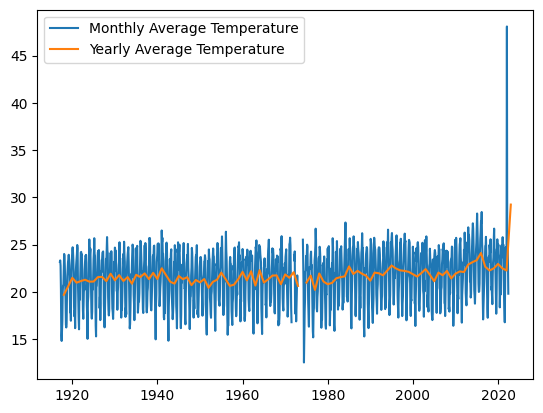

In [ ]:
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, label='Monthly Average Temperature')
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, label='Yearly Average Temperature')
plt.legend()
plt.show()

First, the threshold temperature (celsius) is set for heatwaves and coldspell. Then new dataframe is created where DailyAvgTemp is greater than the heatwave threshold for heatwaves, and DailyAvgTemp is less than the coldspell threshold for coldspell. len() is the length of the object(sum of the heatwaves or coldspell in the entire dataframe)

In [ ]:
heatwave_threshold = 31
coldspell_threshold = 8

heatwaves = df[df['DailyAvgTemp'] > heatwave_threshold]
coldspells = df[df['DailyAvgTemp'] < coldspell_threshold]

print('Number of heatwaves:', len(heatwaves))
if len(heatwaves) > 0:
    print('First heatwave date:', heatwaves.index.min())
    print('Last heatwave date:', heatwaves.index.max())

print('Number of coldspells:', len(coldspells))
if len(coldspells) > 0:
    print('First coldspell date:', coldspells.index.min())
    print('Last coldspell date:', coldspells.index.max())

Number of heatwaves: 3
First heatwave date: 2020-10-02 00:00:00
Last heatwave date: 2022-01-31 00:00:00
Number of coldspells: 13
First coldspell date: 1918-06-24 00:00:00
Last coldspell date: 1981-07-21 00:00:00


The number of drought days, and drought spell is counted from 1902 to 2022. First condition, is used to check if the value is equal to zero which means no rain. Then, cumulative sum is used to calculate consecutive period of days without rain which is the drought spell. 

In [ ]:
drought_days = df['Estiagem'].eq(0).cumsum()
drought_spell = drought_days.groupby(drought_days).transform('count')
drought_spell = drought_spell.where(df['Estiagem'].eq(0))
print('Number of drought days:', drought_days)
print('Drought spell:' , drought_spell)

Number of drought days: Date
1902-06-01        0
1902-06-02        0
1902-06-03        0
1902-06-04        0
1902-06-05        0
              ...  
2022-05-14    13246
2022-05-15    13247
2022-05-16    13247
2022-05-17    13247
2022-05-18    13247
Name: Estiagem, Length: 43608, dtype: int64
Drought spell: Date
1902-06-01    NaN
1902-06-02    NaN
1902-06-03    NaN
1902-06-04    NaN
1902-06-05    NaN
             ... 
2022-05-14    NaN
2022-05-15    4.0
2022-05-16    NaN
2022-05-17    NaN
2022-05-18    NaN
Name: Estiagem, Length: 43608, dtype: float64


To plot the graph,  plotly.graph_objs is imported, and the code is recalled. The 0 values in the Estiagem column is replaced with the length of the previous drought spell (number of consecutive days without rain), or 0 if there was no previous drought spell. Example: If Estiagem column has values [0, 0, 0, 1, 1, 0, 1], then the drought spell would be [0, 0, 0, 0, 0, 2, 0]

In [ ]:
from typing import ValuesView
import pandas as pd
import plotly.graph_objs as go

file_path = '/content/drive/MyDrive/DadosClima_Piracicaba.xlsx'
df = pd.read_excel(file_path)
df['DailyAvgTemp'] = df[['TMED', 'TMAX', 'TMIN']].mean(axis=1)
df['Date'] = pd.to_datetime(df[['ANO', 'MÊS', 'DIA']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d', errors='coerce')
df.set_index('Date', inplace=True)
monthly_avg_temp = df['DailyAvgTemp'].resample('M').mean()
heatwave_threshold = 31
coldspell_threshold = 10
drought_spell = df['Estiagem'].replace(0, np.nan).fillna(method='ffill').fillna(0)
display(drought_spell)

Date
1902-06-01    5.0
1902-06-02    5.0
1902-06-03    5.0
1902-06-04    5.0
1902-06-05    5.0
             ... 
2022-05-14    3.0
2022-05-15    3.0
2022-05-16    3.0
2022-05-17    3.0
2022-05-18    3.0
Name: Estiagem, Length: 43608, dtype: float64

The monthly and daily average temperature, drought spell length, heatwave and coldspell threshold is used to plot the graph over time.

In [ ]:
trace1 = go.Scatter(x=monthly_avg_temp.index, y=monthly_avg_temp.values, name='Monthly Average Temperature')
trace2 = go.Scatter(x=df.index, y=df['DailyAvgTemp'], name='Daily Average Temperature')
trace3 = go.Scatter(x=df.index, y=drought_spell, name='Drought Spell Length')
trace4 = go.Scatter(x=[df.index.min(), df.index.max()], y=[heatwave_threshold, heatwave_threshold], mode='lines', name='Heatwave Threshold', line=dict(color='red', dash='dash'))
trace5 = go.Scatter(x=[df.index.min(), df.index.max()], y=[coldspell_threshold, coldspell_threshold], mode='lines', name='Coldspell Threshold', line=dict(color='blue', dash='dash'))

iplot() function is used to display the plot

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
trace1 = go.Scatter(x=monthly_avg_temp.index, y=monthly_avg_temp.values, name='Monthly Average Temperature')
trace2 = go.Scatter(x=df.index, y=df['DailyAvgTemp'], name='Daily Average Temperature')
trace3 = go.Scatter(x=df.index, y=drought_spell, name='Drought Spell Length')
trace4 = go.Scatter(x=[df.index.min(), df.index.max()], y=[heatwave_threshold, heatwave_threshold], mode='lines', name='Heatwave Threshold', line=dict(color='red', dash='dash'))
trace5 = go.Scatter(x=[df.index.min(), df.index.max()], y=[coldspell_threshold, coldspell_threshold], mode='lines', name='Coldspell Threshold', line=dict(color='blue', dash='dash'))
data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(title='Climatic Data',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Temperature (°C)'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Drought spell is the consecutive days without rain. First condition, is used to check if the value is equal to zero which means no rain. cumulative sum is used to calculate consecutive period of days without rain. By using the length of each drought spell graph is plotted.

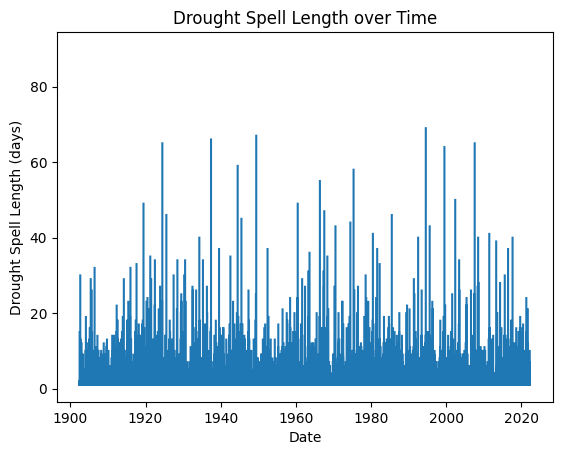

In [ ]:
import matplotlib.pyplot as plt

drought_days = df['Estiagem'].eq(0).cumsum()
drought_spell = drought_days.groupby(drought_days).transform('count')
drought_spell = drought_spell.where(df['Estiagem'].eq(0))

plt.plot(df.index, drought_spell)
plt.title('Drought Spell Length over Time')
plt.xlabel('Date')
plt.ylabel('Drought Spell Length (days)')
plt.show()